### Statistical Modelling. Lecture 3 Example
A model for manufacturer production time (continued)

A manufacturer wants to investigate the time it takes (in minutes) to produce individual orders of different sizes. Data from 20 randomly selected orders is given in [https://raw.githubusercontent.com/uqglmn/sm/main/production.csv](https://raw.githubusercontent.com/uqglmn/sm/main/production.csv). The relation between the run time and run size is expected to be linear.

#### Task 1

Read the data from the file and inspect the result. Then create two vectors, $x$ and $y$, for predictor (Run Size) and response (Run Time) variables.

In [1]:
data = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/production.csv", row.names="Case")  # read data into a dataframe
head(data)  # inspect dataframe

,RunTime,RunSize
,<int>,<int>
1,195,175
2,215,189
3,243,344
4,162,88
5,185,114
6,231,338


In [2]:
x = data$RunSize    # predictor
y = data$RunTime    # response
n = length(y)       # the number of observations

#### Task 2

Fit a simple linear regression model to the data. You will need to use the following formulas:
$$
\hat\beta_1 = \frac{s_{xy}}{s_{xx}} , \qquad \hat\beta_0 = \bar y - \hat\beta_1 \bar x
$$
where
$$
s_{xx} = \sum_{i=1}^n (x_i - \bar x)^2 , \qquad s_{xy} = \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)
$$ 
Then plot the data and the model.

In [3]:
sxx = sum( (x - mean(x))**2 )
sxy = sum( (x - mean(x))*(y - mean(y)) )
sprintf("sxx = %.2f, sxy = %.2f", sxx, sxy) 

[1] "sxx = 191473.75, sxy = 49638.25"

In [4]:
b1hat = sxy/sxx
b0hat = mean(y) - b1hat*mean(x)
sprintf("intercept = %.2f, slope = %.2f", b0hat, b1hat)

[1] "intercept = 149.75, slope = 0.26"

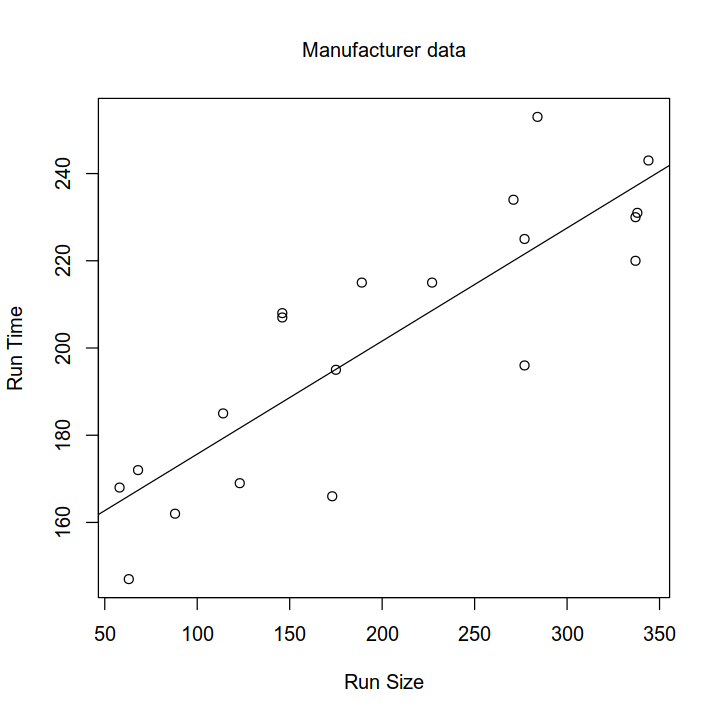

In [5]:
options(repr.plot.width=6, repr.plot.height=6)

plot(x=x, y=y,                     # scatterplot y versus x
     main="Manufacturer data",     # set main title (optional) 
     font.main = 1, cex.main=1,    # title font options (optional)
     xlab="Run Size",              # set x-label (optional)
     ylab="Run Time"               # set y-label (optional)
    )

abline(a=b0hat, b=b1hat)      # add a line with intercept a and slope b

#### Task 3

Find a $95\%$ confidence interval for the slope of the regression model using
$$ 
{\rm CI(\beta_1)} = \big[ \hat\beta_1 - t_{\alpha/2,\, n-2}\cdot {\rm se}(\hat\beta_1), \hat\beta_1 + t_{\alpha/2,\, n-2}\cdot {\rm se}(\hat\beta_1) \big]
$$
where
$$
{\rm se}(\hat\beta_1) = \sqrt{\hat\sigma^2/s_{xx}} ,\qquad \hat\sigma^2 = \frac{1}{n-2}\sum_{i=1}^n (y_i - \hat y_i)^2
$$
Use ``qt(1-0.05/2, n-2)`` to get the critical t-value, $t_{\alpha/2,\, n-2}$.

**Question.** Is 0.25 a plausible value for $\beta_1$? Give a reason to support your answer.



In [6]:
yhat      = b0hat + b1hat * x          # find fitted values from the regression line
sigma2hat = sum( (y-yhat)**2 ) / (n-2) # estimated variance hat-sigma-squared
seb1      = sqrt( sigma2hat/sxx )      # estimated standard error of beta-1
tcrit     = qt(1-0.05/2, n-2)          # critical t-value for 100% - 5%/2 = 97.5%
CImin     = b1hat - tcrit*seb1         # lower bound of the confidence interval
CImax     = b1hat + tcrit*seb1         # upper bound of the confidecne interval

sprintf("A 95%% CI for the slope is [%.3f, %.3f]", CImin, CImax)

[1] "A 95% CI for the slope is [0.181, 0.337]"

**Answer**. The value $0.25$ falls into the 95% CI for $\beta_1$, thus it is a plausible value.

#### Task 4

Compute the total sum of squares, $SS_T$, the regression sum of squares, $SS_R$, and the residual sum of squares, $SS_E$:
$$
SS_T = \sum_{i=1}^n(y_i-\bar y)^2 , \qquad
SS_R = \sum_{i=1}^n(\hat y_i-\bar y)^2 , \qquad
SS_E = \sum_{i=1}^n(y_i-\hat y_i)^2
$$
where $\hat y_i = \hat\beta_0 + \hat\beta_1 x_i$ are fitted values. Then verify that
$$
SS_T = SS_R + SS_E
$$

Hint. Use function ``all.equal()`` to compare floating point numerals.

In [7]:
SST = sum( (y-mean(y))**2 )     # total sum of squares
SSR = sum( (yhat-mean(y))**2 )  # regression sum of squares
SSE = sum( (y-yhat)**2 )        # residual (error) sum of squares

all.equal(SST,SSR+SSE)          # verify a.o.v. identity

[1] TRUE

#### Task 5

Construct the analysis of variance table and test the signifiance of regression assuming $\alpha=5\%$. The critical $F$-value $F_{1-\alpha, 1, n-1}$ can be obtained using ``qf(1-0.05, 1, n-1)``. You need to fill-in the table below.

| Source of Variation |  d.o.f. |   SS   |   MS   |   F   |
|:--------------------|--------:|-------:|-------:|------:|
| Regression          | $\nu_R$ | $SS_R$ | $MS_R$ | $F$   |
| Residual            | $\nu_E$ | $SS_E$ | $MS_E$ |       |
| Total               | $\nu_T$ | $SS_T$ |        |       |

**Question.** Is regression significant?

In [8]:
nu.R = 1    # regression degrees of freedom
nu.E = n-2  # residual degrees of freedom
nu.T = n-1  # total degrees of freedom

MSR  = SSR/nu.R  # mean regression sum of squares
MSE  = SSE/nu.E  # mean residual (error) sum of squares
F    = MSR/MSE   # F-value

# AoV table
table = data.frame(
    Source = c("Regression","Residual","Total"),
    dof = c(nu.R, nu.E, nu.T),
    SS  = round(c(SSR,SSE,SST),2),
    MS  = round(c(MSR,MSE,NA),2),
    F   = round(c(F,NA,NA),2)   
)

table

Source,dof,SS,MS,F
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Regression,1,12868.37,12868.37,48.72
Residual,18,4754.58,264.14,NA
Total,19,17622.95,NA,NA


In [9]:
Fcrit = qf(0.95, nu.R, nu.E)     # critical F-value for 0.95 percentile

sprintf("The calculated F-value is %.2f. The critical F-value is %.2f", F, Fcrit)

[1] "The calculated F-value is 48.72. The critical F-value is 4.41"

**Answer.** The calculated value is $F_{cal} > F_{crit}$, hence the regression is significant.

### Built-in statistical functions

The are built-in statistical functions in R that can do all the hard work for us. 
We can verify our results using these functions.

In [10]:
# fit a simple linear regression model
ProductionTimeModel = lm( RunTime ~ RunSize, data = data ) 
summary(ProductionTimeModel)


Call:
lm(formula = RunTime ~ RunSize, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.597 -11.079   3.329   8.302  29.627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 149.74770    8.32815   17.98 6.00e-13 ***
RunSize       0.25924    0.03714    6.98 1.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 18 degrees of freedom
Multiple R-squared:  0.7302,	Adjusted R-squared:  0.7152 
F-statistic: 48.72 on 1 and 18 DF,  p-value: 1.615e-06


In [11]:
# 95% confidence interval 
round(confint(ProductionTimeModel, level=0.95),3)

,2.5 %,97.5 %
(Intercept),132.251,167.244
RunSize,0.181,0.337


In [12]:
# analysis of variance table
round(anova(ProductionTimeModel),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RunSize,1,12868.37,12868.37,48.72,0
Residuals,18,4754.58,264.14,NA,NA


---